# 2023020131033 熊路阳--Numpy综合训练

## 一、Numpy创建数组、存取文件，完成以下功能。
1. 定义一个列表list1=[1,2,4,6,7,8]，将其转化为数组N1并输出。
2. 定义一个元组tup1=(1,2,3,4,5,6)，将其转化为数组N2并输出。
3. 利用内置函数，定义一个1行6列元素全为1的数组N3并输出。
4. 将N1、N2、N3垂直连接，形成一个3行6列的二维数组N4并输出。
5. 将N4保存为Python二进制数据文件（.npy格式）。

In [3]:
# 1.1
import numpy as np

list1 = [1, 2, 4, 6, 7, 8]
N1 = np.array(list1)

print(N1)

[1 2 4 6 7 8]


In [5]:
# 1.2
tup1 = (1, 2, 3, 4, 5, 6)
N2 = np.array(tup1)

print(N2)

[1 2 3 4 5 6]


In [6]:
# 1.3
N3 = np.ones((1, 6))

print(N3)

[[1. 1. 1. 1. 1. 1.]]


In [8]:
# 1.4
N4 = np.vstack((N1, N2, N3))

print(N4)

[[1. 2. 4. 6. 7. 8.]
 [1. 2. 3. 4. 5. 6.]
 [1. 1. 1. 1. 1. 1.]]


In [9]:
# 1.5 操作部分
np.save('numpy1.npy', N4)
print("save")

save


1.5 实现结果
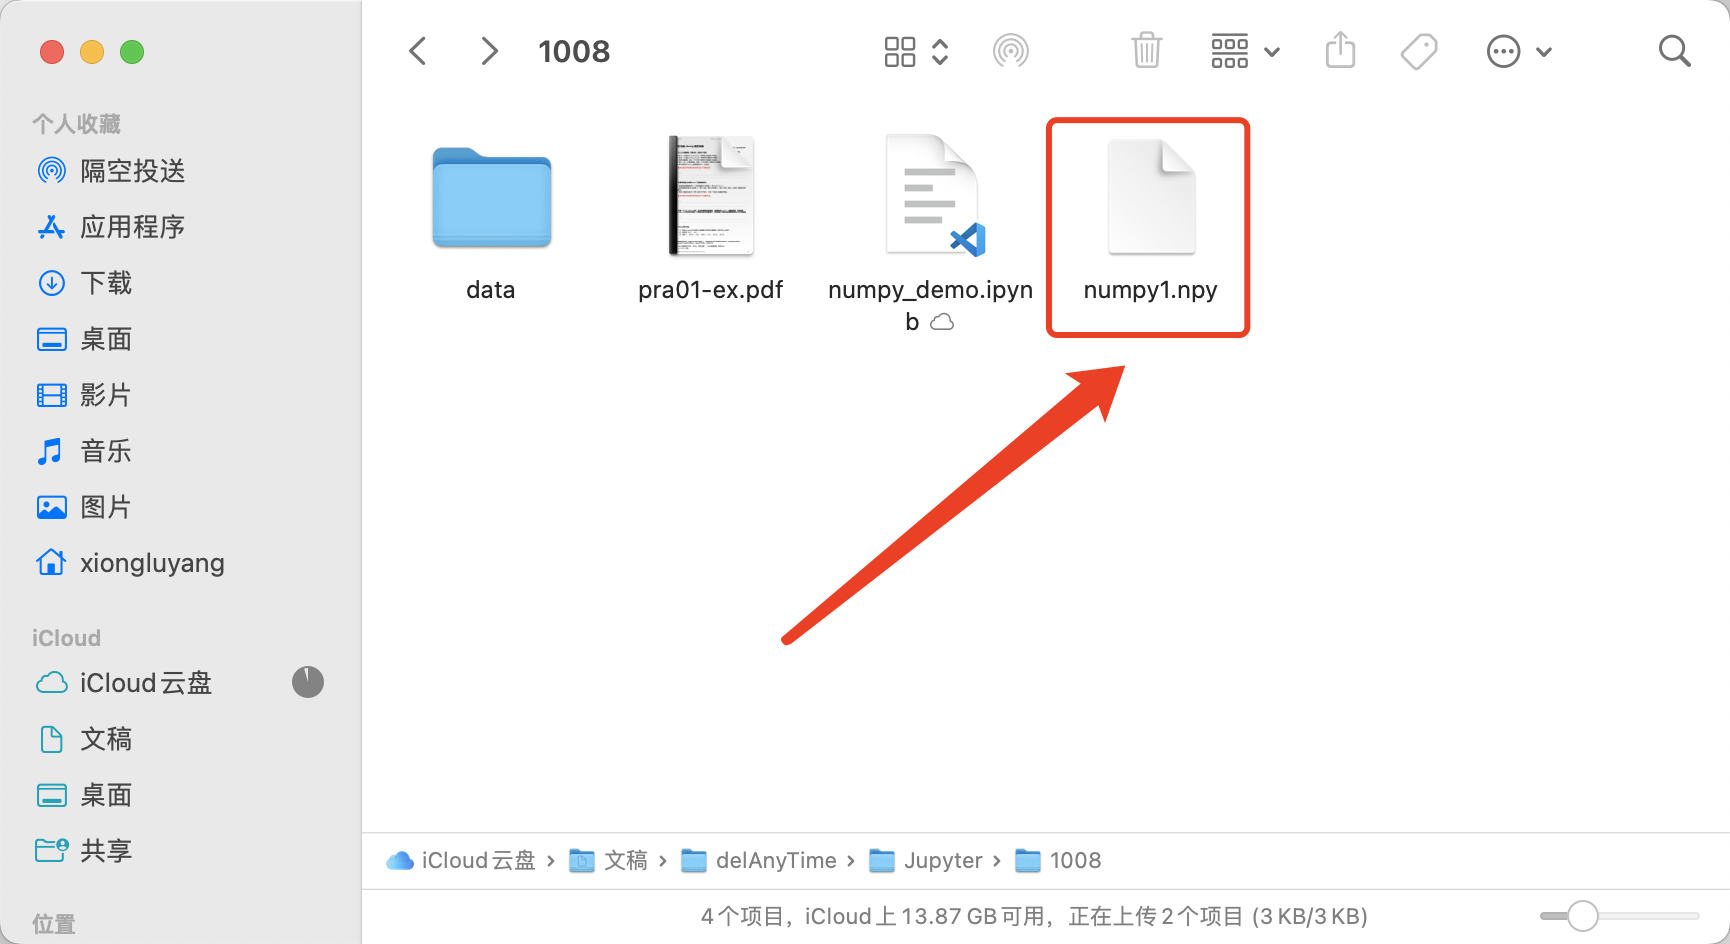

## 二、加载第四题中生成的Python二进制数据文件
1. 将加载后的数据保存于一个新的数组之中并输出（ 数组名请自定义 ）。
2. 提取该数组的第0行中的第1个、第3个元素，第2行中的第0个、第4个元素，组成一个新的二维数组并输
出该数组。
3. 将该二维数组与练习1中的N1进行水平合并，生成一个新的二维数组并输出。

In [11]:
# 2.1
new_N4 = np.load('numpy1.npy')

print(new_N4)

[[1. 2. 4. 6. 7. 8.]
 [1. 2. 3. 4. 5. 6.]
 [1. 1. 1. 1. 1. 1.]]


In [13]:
# 2.2
row0_data = new_N4[0, [1, 3]]

# 提取第2行的第0个和第4个元素
row2_data = new_N4[2, [0, 4]]

# 创建新的二维数组
N22 = np.array([row0_data, row2_data])

print(N22)

[[2. 6.]
 [1. 1.]]


In [17]:
# 2.3
list1 = [1, 2, 4, 6, 7, 8]
N1 = np.array(list1)
# 重新调整N1
N1_New = np.tile(N1, (2, 1))

N23 = np.hstack((N22, N1_New))

print(N23)

[[2. 6. 1. 2. 4. 6. 7. 8.]
 [1. 1. 1. 2. 4. 6. 7. 8.]]


## 三、现有一个data_date.csv文件，该文件的数据列是日期，日期格式为“d-m-y”。请编写程序，实现读取data_date.csv文件中的日期列，并根据日期求出是星期几，然后将每个日期对应的星期转换为Numpy数组输出。

In [4]:
#3
import datetime
N33 = np.loadtxt('data-date.csv',dtype=str,skiprows=1,encoding='GBK')
N33


array(['01-01-2019', '10-02-2019', '12-03-2018', '20-06-2018',
       '16-04-2017', '25-06-2017'], dtype='<U10')

In [6]:
list1 = []
week_list=["xq1","xq2","xq3","xq4","xq5","xq6","xq7"]
for i in N33.tolist():
    y=int(i[6:10])
    m=int(i[3:5])
    d=int(i[0:2])
    a=datetime.date(y,m,d)
    print(a)
    list1.append(week_list[a.weekday()])
    arr_week=np.array(list1)
    print(arr_week)

2019-01-01
['xq2']
2019-02-10
['xq2' 'xq7']
2018-03-12
['xq2' 'xq7' 'xq1']
2018-06-20
['xq2' 'xq7' 'xq1' 'xq3']
2017-04-16
['xq2' 'xq7' 'xq1' 'xq3' 'xq7']
2017-06-25
['xq2' 'xq7' 'xq1' 'xq3' 'xq7' 'xq7']


## 四、Numpy统计计算
1. 利用np.loadtxt()方法读取iris数据集中的花萼长度数据（已保存为csv格式）；
2. 对其进行 排序 、 去重 ；
3. 计算 和 、 累积和 、 均值 、 标准差 、 方差 、 最小值 、 最大值 。

In [8]:
iris=np.loadtxt('iris.csv',delimiter=',',usecols=0,skiprows=1)
print(iris)

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


In [9]:
iris_1 = np.sort(iris)
print(iris_1)

[4.3 4.4 4.4 4.4 4.5 4.6 4.6 4.6 4.6 4.7 4.7 4.8 4.8 4.8 4.8 4.8 4.9 4.9
 4.9 4.9 4.9 4.9 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.1 5.1 5.1 5.1
 5.1 5.1 5.1 5.1 5.1 5.2 5.2 5.2 5.2 5.3 5.4 5.4 5.4 5.4 5.4 5.4 5.5 5.5
 5.5 5.5 5.5 5.5 5.5 5.6 5.6 5.6 5.6 5.6 5.6 5.7 5.7 5.7 5.7 5.7 5.7 5.7
 5.7 5.8 5.8 5.8 5.8 5.8 5.8 5.8 5.9 5.9 5.9 6.  6.  6.  6.  6.  6.  6.1
 6.1 6.1 6.1 6.1 6.1 6.2 6.2 6.2 6.2 6.3 6.3 6.3 6.3 6.3 6.3 6.3 6.3 6.3
 6.4 6.4 6.4 6.4 6.4 6.4 6.4 6.5 6.5 6.5 6.5 6.5 6.6 6.6 6.7 6.7 6.7 6.7
 6.7 6.7 6.7 6.7 6.8 6.8 6.8 6.9 6.9 6.9 6.9 7.  7.1 7.2 7.2 7.2 7.3 7.4
 7.6 7.7 7.7 7.7 7.7 7.9]


In [10]:
iris_2 = np.unique(iris_1)
print(iris_2)

[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.6 7.7 7.9]


In [11]:
# 计算和
total_sum = np.sum(iris_2)

# 计算累积和
cumulative_sum = np.cumsum(iris_2)

# 计算均值
mean_value = np.mean(iris_2)

# 计算标准差
std_deviation = np.std(iris_2)

# 计算方差
variance = np.var(iris_2)

# 计算最小值
min_value = np.min(iris_2)

# 计算最大值
max_value = np.max(iris_2)

# 输出结果
print("总和:", total_sum)
print("累积和:", cumulative_sum)
print("均值:", mean_value)
print("标准差:", std_deviation)
print("方差:", variance)
print("最小值:", min_value)
print("最大值:", max_value)


总和: 210.39999999999998
累积和: [  4.3   8.7  13.2  17.8  22.5  27.3  32.2  37.2  42.3  47.5  52.8  58.2
  63.7  69.3  75.   80.8  86.7  92.7  98.8 105.  111.3 117.7 124.2 130.8
 137.5 144.3 151.2 158.2 165.3 172.5 179.8 187.2 194.8 202.5 210.4]
均值: 6.011428571428571
标准差: 1.0289443768310533
方差: 1.0587265306122449
最小值: 4.3
最大值: 7.9
